# First encouter with PyTorch


Let us explore the basics of PyTorch.


This notebook is a modified version of [this](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html) more extensive introduction to the language.

In [14]:
%matplotlib inline

### Import the torch library

In [15]:
# !pip install torchsummary

In [17]:
import torch
from torchsummary import summary

In [19]:
device = torch.device('cpu')
#device = torch.device('cuda') # Uncomment this to run on GPU

### Create artificial dataset


In [20]:
n = 1000

din = 100 # input dimension
dh = 30 # hidden layer dimension
dout = 10 # output dimension

In [21]:
input_size = (din,)

In [54]:
# create random tensors
x = torch.randn(n, din, device=device)
y = torch.randn(n, dout, device=device)

In [55]:
?torch.randn

In [56]:
print(x.shape, y.shape)

torch.Size([1000, 100]) torch.Size([1000, 10])


### Define a simple network

In [57]:
model = torch.nn.Sequential(
          torch.nn.Linear(din, dh, bias=True),
          torch.nn.Sigmoid(),
          torch.nn.Linear(dh, dout),
        ).to(device)

In [58]:
print(model)

Sequential(
  (0): Linear(in_features=100, out_features=30, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=30, out_features=10, bias=True)
)


In [59]:
summary(model, input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 30]           3,030
           Sigmoid-2                   [-1, 30]               0
            Linear-3                   [-1, 10]             310
Total params: 3,340
Trainable params: 3,340
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [60]:
d1 = 100
d2 = 30

model2 = torch.nn.Sequential(
          torch.nn.Linear(din, d1, bias=True),
          torch.nn.Sigmoid(),
          torch.nn.Linear(d1, d2, bias=True),
          torch.nn.Sigmoid(),
          torch.nn.Linear(d2, dout),
        ).to(device)

In [61]:
summary(model2, input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          10,100
           Sigmoid-2                  [-1, 100]               0
            Linear-3                   [-1, 30]           3,030
           Sigmoid-4                   [-1, 30]               0
            Linear-5                   [-1, 10]             310
Total params: 13,440
Trainable params: 13,440
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.05
Estimated Total Size (MB): 0.05
----------------------------------------------------------------


### Exercise

- Explain the number of parameters reported
- Scaling of the number of parameters with the number of units
- Define an identical network with ReLU activation function

### Evaluate the network on data


The network is a function of x. Evaluating it is as plain as possible.

In [62]:
y_pred = model(x)

In [63]:
print(y_pred.shape)

torch.Size([1000, 10])


### Define a loss function

In [64]:
loss_fn = torch.nn.MSELoss(reduction='mean')

In [65]:
loss = loss_fn(y_pred,y)

In [66]:
type(loss.item())

float

In [67]:
print(loss.item())

1.1202483177185059


In [68]:
for p in model.parameters():
    print(p.shape)

torch.Size([30, 100])
torch.Size([30])
torch.Size([10, 30])
torch.Size([10])


In [69]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[ 0.0114,  0.0167,  0.0804,  ...,  0.0948, -0.0544,  0.0371],
        [-0.0560, -0.0593, -0.0401,  ...,  0.0345,  0.0629, -0.0186],
        [ 0.0033,  0.0993, -0.0793,  ...,  0.0542, -0.0039,  0.0250],
        ...,
        [ 0.0782, -0.0736, -0.0812,  ...,  0.0901,  0.0101, -0.0552],
        [-0.0133, -0.0175,  0.0100,  ...,  0.0240,  0.0994, -0.0762],
        [-0.0775,  0.0587, -0.0216,  ...,  0.0609,  0.0466, -0.0160]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0471, -0.0600,  0.0924, -0.0328, -0.0514,  0.0067,  0.0321, -0.0569,
        -0.0497,  0.0137,  0.0094, -0.0896, -0.0083,  0.0680,  0.0067, -0.0156,
        -0.0493, -0.0854, -0.0710, -0.0044, -0.0460, -0.0744, -0.0973,  0.0801,
         0.0174, -0.0292,  0.0023,  0.0336, -0.0596, -0.0625],
       requires_grad=True)
Parameter containing:
tensor([[ 0.1435, -0.0104, -0.1503,  0.0325,  0.0375, -0.1224,  0.0096, -0.0555,
          0.1462, -0.0328,  0.0888, -0.0384,  0.1142, -0.0145,

In [82]:
A  = list(model.parameters())[-1]
A

Parameter containing:
tensor([ 0.0145,  0.1029, -0.0782, -0.1537, -0.0337,  0.1751, -0.0848,  0.0963,
        -0.0106, -0.1592], requires_grad=True)

In [83]:
A.requires_grad=True

In [84]:
for p in model.parameters():
    print(p.requires_grad)

True
True
True
True


### Training

In [73]:
lr = 1e-4
nepochs = 5000
training_loss = []

In [74]:
for t in range(nepochs):
    
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)
    training_loss.append(loss.item())
    
    
    # ---------------------------------   Modification of the parameters due to the loss
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its data and gradients like we did before.
    
    with torch.no_grad():
        for param in model.parameters():
            param.data -= lr * param.grad
            
    # -----------------------------------------------------------------------------------

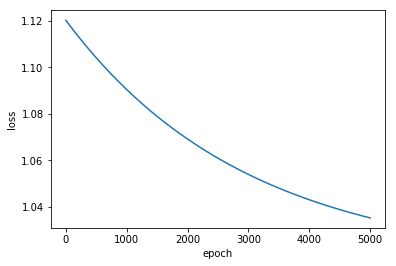

In [75]:
from matplotlib import pyplot as plt
plt.plot(training_loss,'-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

This example is meant just to illustrate the basic PyTorch machinery at work: it is not representative of true learning problems since there is no separate test set against which to evaluate the algorithm. We will use the MNIST dataset for our following experiments.

# Another way

This is another way to define a network in PyTorch: we define a class with its methods. 
It will be useful when we will create new methods to extract representations.

In [87]:
import torch.nn as nn

In [88]:
class Net(nn.Module):
    def __init__(self,din=784, dh=30, dout=10):
        super(Net, self).__init__()
        
        self.lin1 = nn.Linear(din, dh)
        self.lin2 = nn.Linear(dh, dout)
    
    def forward(self, x):    
        x = torch.sigmoid(self.lin1(x)) 
        return self.lin2(x)
    
    #-----------------------------------------------------#
    def extract(self,x):
        return torch.sigmoid(self.lin1(x))

In [89]:
model2 = Net(din,dh,dout).to(device)

In [90]:
print(model)
print(model2)

Sequential(
  (0): Linear(in_features=100, out_features=30, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=30, out_features=10, bias=True)
)
Net(
  (lin1): Linear(in_features=100, out_features=30, bias=True)
  (lin2): Linear(in_features=30, out_features=10, bias=True)
)


In [92]:
print(summary(model,input_size))
print(summary(model, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 30]           3,030
           Sigmoid-2                   [-1, 30]               0
            Linear-3                   [-1, 10]             310
Total params: 3,340
Trainable params: 3,340
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------
None
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 30]           3,030
           Sigmoid-2                   [-1, 30]               0
            Linear-3                   [-1, 10]             310
Total params: 3,340
Trainable params: 3,

In [93]:
assert(model2.extract(x).shape[1] == dh)